### W12D1 - Pratica

#### Esercizio 1: 
Sul database titanic, effettuiamo le seguenti analisi.

In [1]:
%run "connessione_DB_Titanic.ipynb"                #Eseguo connessione database 'Titanic' in MySQL

DB name è uguale a Titanic
Sono collegata al DB!


In [2]:
query = """SELECT * FROM titanic"""                #Definisco query SQL, per selezionare tutte righe tabella 'titanic'
titanic = pd.read_sql(query, db_engine)            #Eseguo query SQL, utilizzando motore 'db_engine' e carico risultati nel DataFrame
display(titanic)                                   #Visualizzo risultati DataFrame

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,,S,0,10-4-1912
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,1,11-4-1912
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,0,10-4-1912
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,,S,0,10-4-1912


* Quanti ponti c'erano sulla nave?

In [3]:
#Da una prima verica del DataFrame, noto che nella colonna 'Cabin', ci sono alcuni dati nulli impliciti (stringhe vuote)
#Verifico conteggio totale valori mancanti (NA/NaN), per ogni colonna 
print(titanic.isna().sum())

#Non trova nessun valore NaN nella colonna'Cabin'

PassengerId    0
PClass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
EmbarkDate     0
dtype: int64


In [4]:
#Filtro righe dove colonna 'Cabin' è vuota 
filtro = titanic["Cabin"] == ""
display(titanic.loc[filtro])

#l'output mi conferma quello che già avevo visto visivamente, che ci sono 1014 stringhe vuote, con dati nulli impliciti

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912
5,6,3,"Moran, Mr. James",male,0.0,0,0,330877,8.46,,Q,0,11-4-1912
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.08,,S,0,10-4-1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.78,,S,1,10-4-1912
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,,S,0,10-4-1912
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,0,10-4-1912
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,,S,0,10-4-1912


In [5]:
#Creo lista vuota, per contenere lettere iniziali valori colonna 'Cabin'
ponti = []

#Itero sui valori colonna 'Cabin'
for cabin in titanic["Cabin"]:
    if cabin != "":                    #Controllo che valore non sia vuoto
        prima_lettera = cabin[0]       #Estraggo prima lettera del valore della cabina
        ponti.append(prima_lettera)    #Aggiungo prima lettera alla lista 'ponti'
        
ponti = sorted(set(ponti))             #Converto lista 'ponti' in insieme (set) per eliminare duplicati e poi ordino -> casting
numero_ponti = len(ponti)              #Calcolo numero ponti

#Stampo numero ponti e lista ordinata
print(f"Il numero di ponti era {numero_ponti}: {ponti}")  

Il numero di ponti era 8: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']


* Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco.

In [6]:
#Verifica testuale numero passeggeri di ogni classe imbarco
print(titanic["PClass"].unique(), "\n")      #Verifico valori unici colonna 'PClass' -> numeri classi totali
print(titanic["PClass"].value_counts())      #Conto frequenza valori colonna 'PClass' -> numero passeggeri per classe

[3 1 2] 

PClass
3    709
1    323
2    277
Name: count, dtype: int64


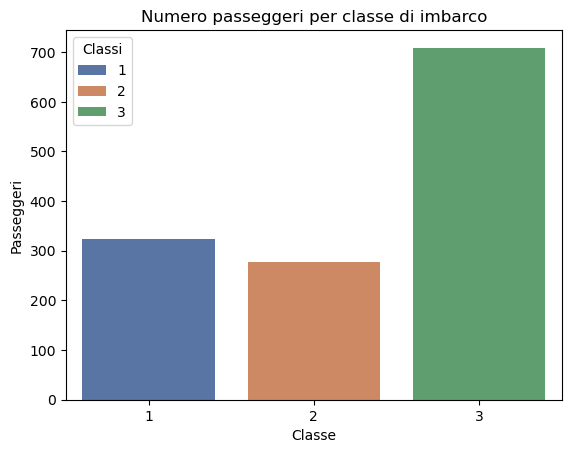

In [7]:
#Verifica grafica numero passeggeri di ogni classe imbarco

#Importo librerie per creazione grafici
import matplotlib.pyplot as plt
import seaborn as sns

#Creo grafico a colonne, per visualizzare numero passeggeri, per classe imbarco
sns.countplot(data=titanic, x="PClass", hue="PClass", palette="deep")   
#countplot -> versione grafica di .value_counts()
#data=titanic -> dataframe 'titanic' come sorgente dati
#x="PClass" -> imposto colonna 'PClass' asse x, che rappresenta classi passeggeri
#hue="PClass" -> coloro barre in base valori colonna 'PClass', distinguendo classi
#palette="deep" -> utilizzo palette colori 'deep', per differenziare visivamente barre
plt.title("Numero passeggeri per classe di imbarco")                 #Imposto titolo grafico
plt.xlabel("Classe")                                                 #Etichetta asse X (classe imbarco: Prima, Seconda, Terza)
plt.ylabel("Passeggeri")                                             #Etichetta asse Y (numero passeggeri)
plt.legend(title="Classi")                                           #Mostro legenda 
plt.show()                                                           #Visualizzo grafico

* Fare la stessa cosa per la colonna '*Survived*'.

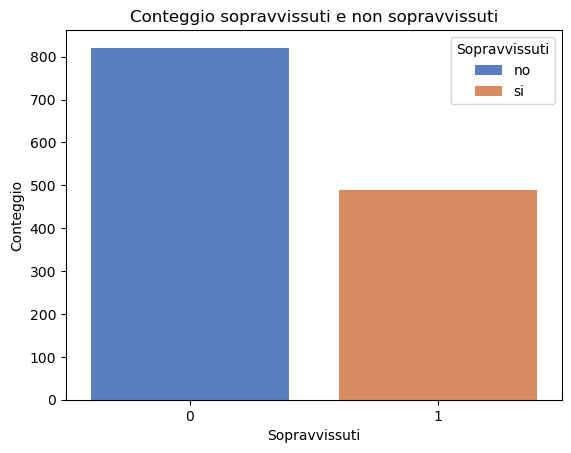

In [8]:
#Creo grafico a colonne, per visualizzare conteggio sopravvissuti e non sopravvissuti
sns.countplot(data=titanic, x="Survived", hue="Survived", palette="muted")
plt.title("Conteggio sopravvissuti e non sopravvissuti")                   #Imposto titolo grafico
plt.xlabel("Sopravvissuti")                                                #Etichetta asse X (sopravvivenza: 0 = No, 1 = Sì)
plt.ylabel("Conteggio")                                                    #Etichetta asse Y (numero persone)
plt.legend(["no", "si"], title="Sopravvissuti")                            #Mostro legenda 
plt.show()                                                                 #Visualizzo grafico

* Qual era la distribuzione delle tariffe ('*fare*')?

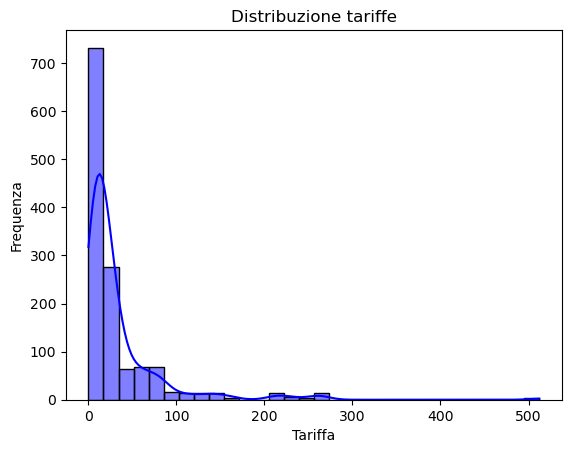

In [9]:
#Creo istogramma, per visualizzare distribuzione tariffe
sns.histplot(titanic["Fare"], kde=True, color="blue", bins=30)  
#histplot -> mostra distribuzione set dati, raggruppando valori in intervalli e conta quanti valori ci sono in ciascun intervallo
#kde=True -> aggiungo curva densità, per rappresentare distribuzione
#bins=30 -> suddivido range valori 'Fare' in 30 intervalli o "bin", per creare istogramma
plt.title("Distribuzione tariffe")                                  #Imposto titolo grafico
plt.xlabel("Tariffa")                                               #Etichetta asse X (tariffa pagata passeggeri)
plt.ylabel("Frequenza")                                             #Etichetta asse Y (frequenza tariffe)
plt.show()                                                          #Visualizzo grafico

* Riusciamo a vedere la distribuzione delle età dei passeggeri, rispetto alla classe di imbarco?                                         
  Proviamo con un boxplot e con un violinplot.

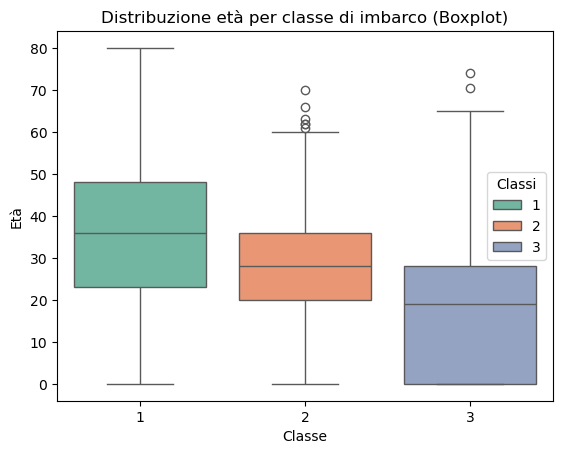

In [10]:
#Creo boxplot, per visualizzare distribuzione età, per classe imbarco
sns.boxplot(data=titanic, x="PClass", y="Age", hue="PClass", palette="Set2")
#boxplot -> mostra distribuzione variabile numerica, attraverso suoi quartili, evidenziando eventuali valori anomali
#c'è sempre bisogno di una colonna categorica e di una colonna numerica
plt.title("Distribuzione età per classe di imbarco (Boxplot)")                 #Imposto titolo grafico
plt.xlabel("Classe")                                                           #Etichetta asse X (classe imbarco: Prima, Seconda, Terza)
plt.ylabel("Età")                                                              #Etichetta asse Y (età passeggeri)
plt.legend(title="Classi")                                                     #Mostro legenda 
plt.show()                                                                     #Visualizzo grafico

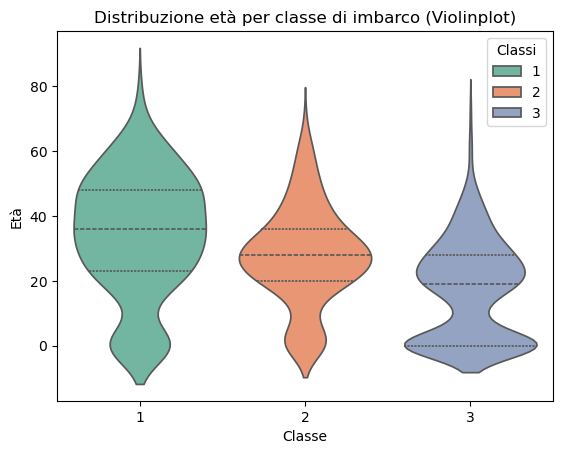

In [11]:
#Creo violinplot, per visualizzare distribuzione età, per classe imbarco
sns.violinplot(data=titanic, x="PClass", y="Age", hue="PClass", palette="Set2", inner="quartile")
#violinplot -> "forma a violino" rappresenta distribuzione dati (simile a boxplot), nel centro mostra mediana e quartili.
#inner="quartile" -> aggiungo linee all'interno violini, per rappresentare quartili distribuzione dati
plt.title("Distribuzione età per classe di imbarco (Violinplot)")          #Imposto titolo grafico
plt.xlabel("Classe")                                                       #Etichetta asse X (classe imbarco: Prima, Seconda, Terza)
plt.ylabel("Età")                                                          #Etichetta asse Y (età passeggeri)
plt.legend(title="Classi")                                                 #Mostro legenda 
plt.show()                                                                 #Visualizzo grafico

* Visualizziamo un boxplot rispetto alle colonne '*fare*' e '*survived*'. Che cosa ne deduciamo?
  * Dal grafico possiamo trarre diverse conclusioni, sulla relazione tra la tariffa pagata dai passeggeri del Titanic e la loro probabilità di sopravvivenza:
    * **Influenza della tariffa**: I passeggeri con tariffe più alte sembrano avere una maggiore probabilità di sopravvivenza, indicando che la classe sociale o il tipo di cabina potrebbe aver influito. Questo è evidente dalla prevalenza delle tariffe elevate tra i sopravvissuti;
    * **Variabilità delle tariffe**: Le tariffe dei sopravvissuti mostrano una maggiore variabilità rispetto a quelle dei non sopravvissuti, suggerendo che le tariffe elevate non garantivano la sopravvivenza, pur mostrando una correlazione generale.
    * **Valori anomali**: Alcuni outlier con tariffe molto elevate tra i sopravvissuti, potrebbero rappresentare passeggeri con suite lussuose o privilegi speciali;
    * **Distribuzione generale**: La maggior parte dei non sopravvissuti aveva pagato tariffe basse, riflettendo una maggiore presenza nella classe economica.

In conclusione, dal grafico deduciamo che i fattori economici e sociali sembrano aver avuto un ruolo importante nella probabilità di sopravvivenza.

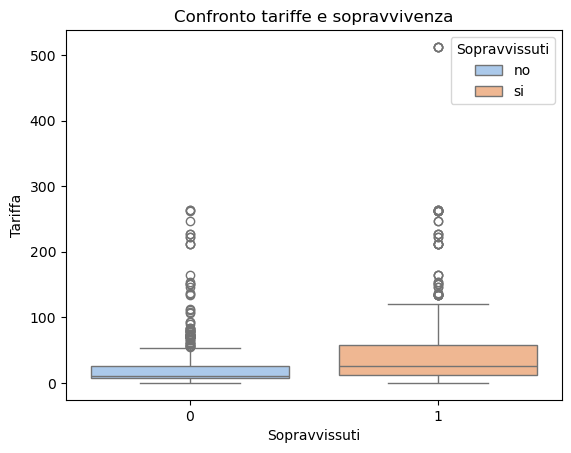

In [12]:
#Creo boxplot, per confrontare distribuzione tariffe, rispetto sopravvivenza
sns.boxplot(data=titanic, x="Survived", y="Fare", hue="Survived", palette="pastel")
plt.title("Confronto tariffe e sopravvivenza")                                      #Imposto titolo grafico
plt.xlabel("Sopravvissuti")                                                         #Etichetta asse X (sopravvivenza: 0 = No, 1 = Sì)
plt.ylabel("Tariffa")                                                               #Etichetta asse Y (tariffa pagata passeggeri)
plt.legend(["no", "si"], title="Sopravvissuti")                                     #Mostro legenda 
plt.show()                                                                          #Visualizzo grafico

#### Esercizio 2:
Scarichiamo il dataset stockdata.csv.

In [13]:
stock = pd.read_csv("Datasets/altri_dataset/stockdata.csv")
display(stock)

,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09
...,...,...,...,...,...,...
2301,51.360001,132.800003,58.110001,96.099998,1929.800049,2016-02-24
2302,52.099998,134.500000,58.750000,96.760002,1951.699951,2016-02-25
2303,51.299999,132.029999,58.340000,96.910004,1948.050049,2016-02-26
2304,50.880001,131.029999,58.209999,96.690002,1932.229980,2016-02-29


* Visualizziamo l'andamento delle azioni della Apple ("AAPL").

In [14]:
#Imposto colonna 'Date', come indice DataFrame
stock = stock.set_index("Date")
display(stock)

,MSFT,IBM,SBUX,AAPL,GSPC
Date,,,,,
2007-01-03,23.950705,80.517962,16.149666,11.086612,1416.599976
2007-01-04,23.910599,81.378851,16.167992,11.332687,1418.339966
2007-01-05,23.774242,80.642129,16.099269,11.251984,1409.709961
2007-01-08,24.006852,81.867244,16.039710,11.307550,1412.839966
2007-01-09,24.030914,82.835742,15.970989,12.246870,1412.109985
...,...,...,...,...,...
2016-02-24,51.360001,132.800003,58.110001,96.099998,1929.800049
2016-02-25,52.099998,134.500000,58.750000,96.760002,1951.699951
2016-02-26,51.299999,132.029999,58.340000,96.910004,1948.050049


<Figure size 1000x600 with 0 Axes>

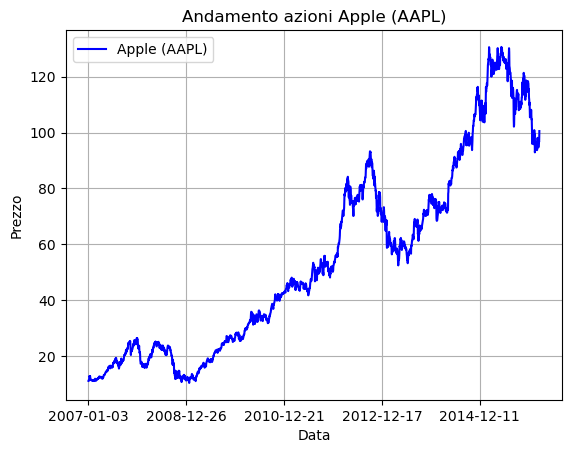

In [15]:
plt.figure(figsize=(10, 6))                                                   #Imposto dimensione figura grafico
stock.plot(y="AAPL", kind="line", color="blue", label="Apple (AAPL)")         #Creo grafico lineare, per prezzi azioni Apple (AAPL)
#lineplot -> mostra come dati cambiano in relazione asse continuo, utilizzato per rappresentare andamenti temporali o variabili ordinate
plt.title("Andamento azioni Apple (AAPL)")                                    #Imposto titolo grafico
plt.xlabel("Data")                                                            #Etichetta asse X 
plt.ylabel("Prezzo")                                                          #Etichetta asse Y 
plt.legend()                                                                  #Mostro legenda per identificare linee grafico
plt.grid()                                                                    #Aggiungo griglia 
plt.show()                                                                    #Visualizzo grafico

* Visualizziamo l'andamento di tutte le azioni del dataset.

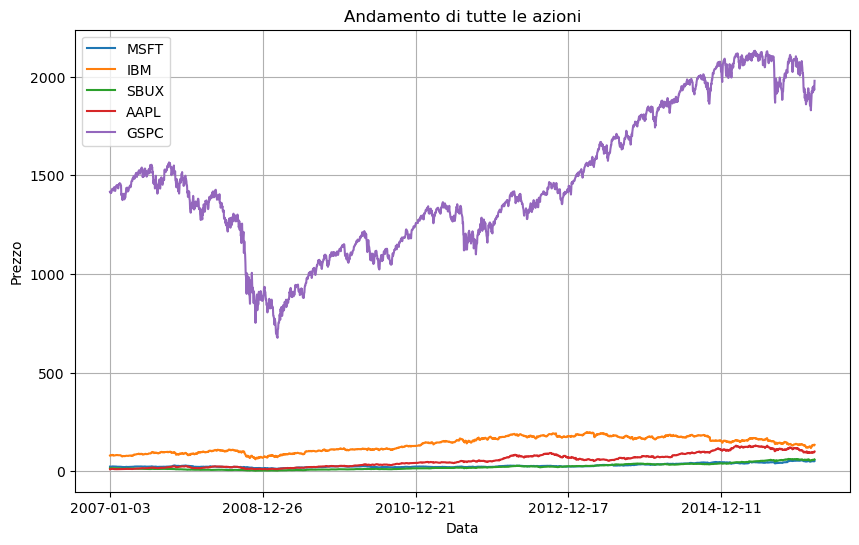

In [16]:
stock.plot(figsize=(10, 6), title="Andamento di tutte le azioni")    #Creo grafico azioni generico, con dimensioni specificate e titolo
plt.xlabel("Data")                                                   #Etichetta asse X 
plt.ylabel("Prezzo")                                                 #Etichetta asse Y 
plt.legend()                                                         #Mostro legenda per identificare linee grafico
plt.grid()                                                           #Aggiungo griglia 
plt.show()                                                           #Visualizzo grafico

* Visualizziamo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013.

In [17]:
stock = stock.reset_index()                                        #Ripristino indice come colonna
stock["Date"] = pd.to_datetime(stock["Date"])                      #Mi assicuro che colonna 'Date' sia formato datetime

In [18]:
#Filtro dati, utilizzando colonna 'Date'
stock_filtered = stock[(stock["Date"] >= "2012-01-01") & (stock["Date"] <= "2013-12-31")]

<Figure size 1000x600 with 0 Axes>

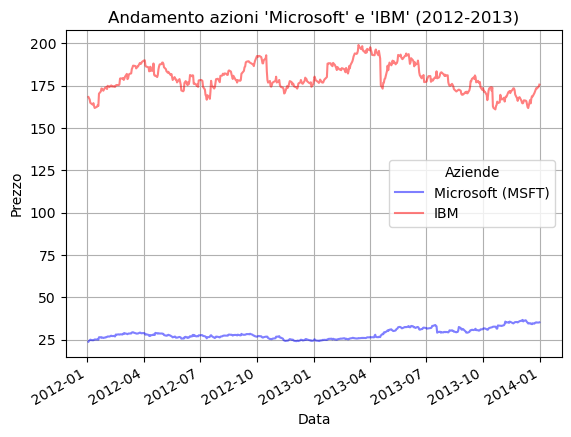

In [19]:
plt.figure(figsize=(10, 6))                                                     #Imposto dimensione figura grafico

#Creo grafico a linee, per mostrare andamento prezzi azioni
stock_filtered.plot(kind="line", x="Date", y=["MSFT", "IBM"], color=["blue", "red"], alpha=0.5)   
#kind="line" -> specifico tipo grafico (linee)
#x="Date" -> colonna 'Date' assegnata asse X
#y=["MSFT", "IBM"] -> colonne 'MSFT' e 'IBM' assegnate asse Y
#color=["blue", "red"] -> assegno colore blu a 'Microsoft' e rosso a 'IBM'
#alpha=0.5 -> imposto trasparenza 50% per le linee
plt.title("Andamento azioni 'Microsoft' e 'IBM' (2012-2013)")                   #Imposto titolo grafico
plt.xlabel("Data")                                                              #Etichetta asse X
plt.ylabel("Prezzo")                                                            #Etichetta asse Y 
plt.legend(["Microsoft (MSFT)", "IBM"], title="Aziende")                        #Mostro legenda per identificare linee grafico
plt.grid()                                                                      #Aggiungo griglia 
plt.show()                                                                      #Visualizzo grafico

* Con un istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso.

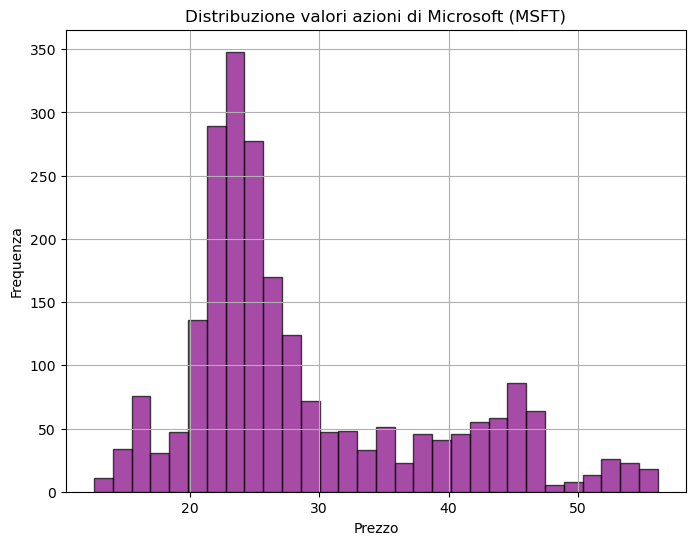

In [20]:
plt.figure(figsize=(8, 6))                                                   #Imposto dimensione figura 

#Creo istogramma, per dati azioni Microsoft (colonna 'MSFT')
stock["MSFT"].plot(kind="hist", bins=30, color="purple", edgecolor="black", alpha=0.7)
#bins=30 -> suddivido dati in 30 intervalli
#edgecolor="black" -> definisco bordi neri per le barre
#alpha=0.7 -> imposto livello trasparenza del 70%
plt.title("Distribuzione valori azioni di Microsoft (MSFT)")                 #Imposto titolo grafico
plt.xlabel("Prezzo")                                                         #Etichetta asse X
plt.ylabel("Frequenza")                                                      #Etichetta asse Y
plt.grid()                                                                   #Aggiungo griglia
plt.show()                                                                   #Visualizzo grafico

#### Esercizio 3:
Colleghiamoci al dataset metal_bands_2017.csv. 

In [21]:
metal = pd.read_csv("Datasets/altri_dataset/metal_bands_2017.csv", encoding="latin1")
display(metal)

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...,...
4995,4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


* Con Seaborn visualizziamo l'**istogramma** del numero dei fan delle varie band; cosa si vede? Cose ne deduciamo?
  * Il numero di fan delle band si concentra principalmente tra 0 e 100 fan. L'istogramma mostra un picco iniziale significativo che cala rapidamente all'aumentare dei fan, indicando che solo poche band hanno un grande seguito, mentre la maggioranza ha pochi fan.
  * La scena musicale è dominata da poche band con molti fan, mentre la maggior parte ha una base limitata -> questo riflette una frammentazione in nicchie o generi emergenti e segue la "tendenza naturale" del principio 80/20: poche band raggiungono grande successo, mentre molte altre rimangono in una scena di nicchia. È un fenomeno comune, con una minoranza che domina e la maggioranza che compete per il resto.

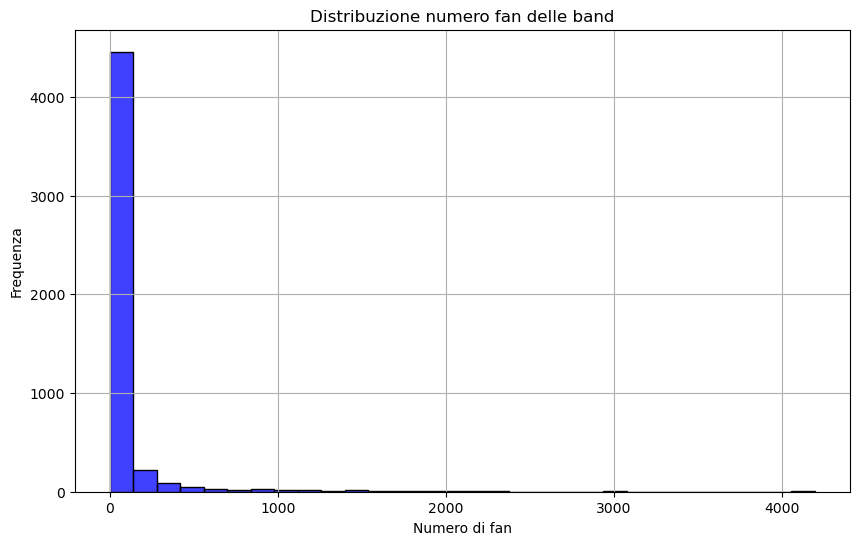

In [22]:
plt.figure(figsize=(10, 6))                                          #Imposto dimensione figura
sns.histplot(metal["fans"], bins=30, kde=False, color="blue")        #Creo istogramma, per visualizzare distribuzione numero fan band
#bins=30 -> suddivido valori fan in 30 intervalli
#kde=False -> non mostro curva densità
plt.title("Distribuzione numero fan delle band")                     #Imposto titolo grafico
plt.xlabel("Numero di fan")                                          #Etichetta asse X
plt.ylabel("Frequenza")                                              #Etichetta asse Y
plt.grid()                                                           #Aggiungo griglia
plt.show()                                                           #Visualizzo grafico

* Delle band che suonano sia '*Progressive*' che '*Thrash*', realizziamo un **barplot**, che mostri quanti fan ci sono in totale, rispetto al paese di origine                                                                                                             
  (nota: in questo caso specifico, per accedere alla colonna '*style*', dovremo usare ["style"] e non *.style*, perché quest'ultimo è un metodo).

In [23]:
#Filtro band che suonano 'Progressive' e 'Thrash'
filtered_metal = metal[metal["style"].str.contains("Progressive") & metal["style"].str.contains("Thrash")]

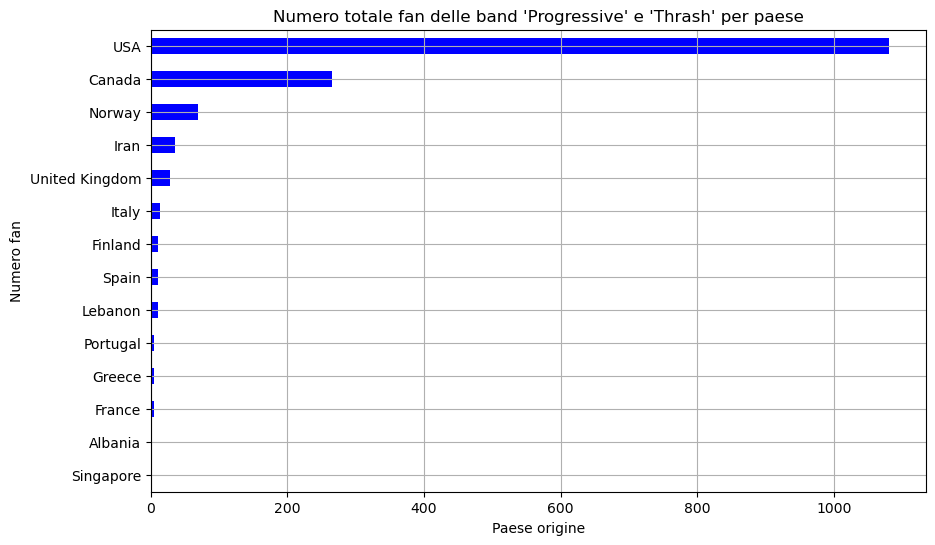

In [24]:
plt.figure(figsize=(10, 6))                                                         #Imposto dimensione figura

#Raggruppo dati per paese origine ('origin'), somma fan per paese, ordino valori ordine crescente e creo grafico a barre orizzontali
filtered_metal.groupby("origin")["fans"].sum().sort_values().plot(kind="barh", color="blue")
#kind="barh" -> specifico grafico a barre orizzontali
plt.title("Numero totale fan delle band 'Progressive' e 'Thrash' per paese")        #Imposto titolo grafico  
plt.xlabel("Paese origine")                                                         #Etichetta asse X
plt.ylabel("Numero fan")                                                            #Etichetta asse Y
plt.grid()                                                                          #Aggiungo griglia
plt.show()                                                                          #Visualizzo grafico

* Visualizziamo un **istogramma** delle date di formazione delle band (potremo dover convertire in qualche modo questo dato); si nota qualche trend?

In [25]:
print(metal.dtypes)     #Verifico tipo dati colonna 'formed'

Unnamed: 0     int64
band_name     object
fans           int64
formed        object
origin        object
split         object
style         object
dtype: object


In [26]:
#Converto colonna 'formed' in formato datetime
metal["formed"] = pd.to_datetime(metal["formed"], errors="coerce")
#errors="coerce" -> forzo valori non validi (-), a diventare NaT (Not a Time), evitando errori durante la conversione

In [27]:
print(metal.dtypes)     #Verifico tipo dati colonna 'formed', dopo la conversione 

Unnamed: 0             int64
band_name             object
fans                   int64
formed        datetime64[ns]
origin                object
split                 object
style                 object
dtype: object


Si nota qualche trend?

L'istogramma mostra chiaramente alcuni trend, riguardo le date di formazione delle band:
 * Si nota un aumento significativo nel numero di band, formate a partire dalla fine degli anni '70;
 * Gli anni '80 e '90 rappresentano un periodo di crescita continua, con una sempre maggiore formazione di band;
 * Il picco massimo si osserva intorno ai primi anni 2000, dove il numero di band formate raggiunge il suo apice;
 * Dopo questo picco, c'è un calo, ma il numero di band resta comunque più alto, rispetto ai decenni precedenti.
      
Questo tipo di distribuzione potrebbe riflettere l'influenza di tendenze culturali e musicali, come l'espansione della scena musicale internazionale e il boom di nuovi generi. 

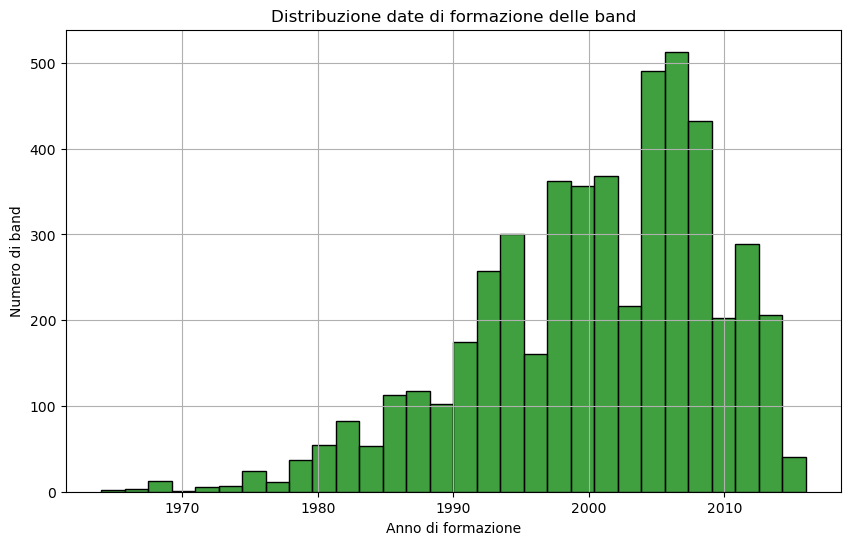

In [28]:
plt.figure(figsize=(10, 6))                                                     #Imposto dimensione figura
sns.histplot(metal["formed"].dropna(), bins=30, kde=False, color="green")       #Creo istogramma date formazione band
#metal["formed"].dropna() -> rimuovo eventuali valori NaT (non validi) colonna 'formed'
#bins=30 -> suddividi dati in 30 intervalli
#kde=False -> non mostro curva densità
plt.title("Distribuzione date di formazione delle band")                        #Imposto titolo grafico
plt.xlabel("Anno di formazione")                                                #Etichetta asse X 
plt.ylabel("Numero di band")                                                    #Etichetta asse Y
plt.grid()                                                                      #Aggiungo griglia
plt.show()                                                                      #Visualizzo grafico

#### Esercizio 4:
Scarichiamo il dataset elections.csv.

In [29]:
election  = pd.read_csv("Datasets/altri_dataset/election.csv")
display(election)

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112
5,113-Jeanne-Mance,1455,3599,2316,7370,Bergeron,plurality,113
6,12-Saint-Sulpice,3252,2521,2543,8316,Coderre,plurality,12
7,121-La Pointe-aux-Prairies,5456,1760,3330,10546,Coderre,majority,121
8,122-Pointe-aux-Trembles,4734,1879,2852,9465,Coderre,majority,122
9,123-Rivière-des-Prairies,5737,958,1656,8351,Coderre,majority,123


* Con un grafico a barre, confrontiamo i voti totali presi dai tre candidati (come somma di tutti i distretti).

In [30]:
#Calcolo somma totale voti ricevuti da ciascun candidato
candidate_totals = election[["Coderre", "Bergeron", "Joly"]].sum()

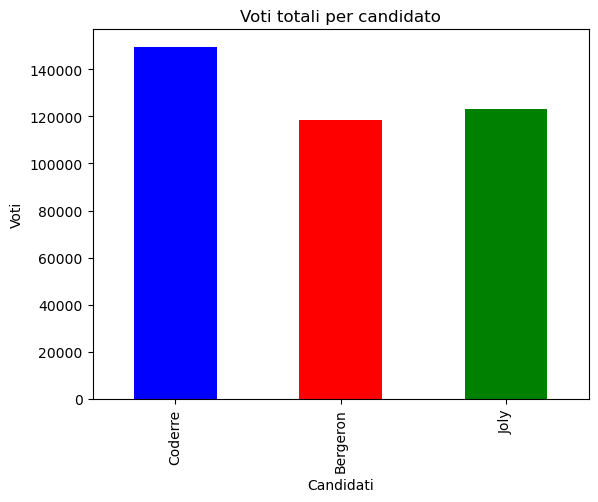

In [31]:
#Creo grafico a barre, per visualizzare voti totali ricevuti dai candidati
candidate_totals.plot(kind="bar", color=["blue", "red", "green"])  
#barplot -> mostra dati con barre di diversa lunghezza, ogni barra è una categoria e la sua lunghezza è valore o frequenza associata 
plt.title("Voti totali per candidato")                                     #Imposto titolo grafico
plt.xlabel("Candidati")                                                    #Etichettia asse X
plt.ylabel("Voti")                                                         #Etichettia asse Y
plt.show()                                                                 #Visualizzo grafico 

* Con un grafico a barre, confrontiamo il numero di votanti, per i primi dieci distretti.

In [32]:
#Ordino distretti in base a 'district_id' e seleziono primi dieci distretti
top_ten_districts = election.sort_values(by='district_id').head(10)

In [33]:
print(sorted(election['district_id'].unique()))

[11, 12, 13, 14, 21, 22, 23, 31, 32, 33, 34, 35, 41, 42, 43, 51, 52, 61, 62, 63, 64, 71, 72, 73, 74, 81, 82, 91, 92, 93, 94, 101, 102, 111, 112, 113, 121, 122, 123, 131, 132, 133, 134, 141, 142, 151, 152, 161, 162, 171, 172, 181, 182, 183, 191, 192, 193, 194]


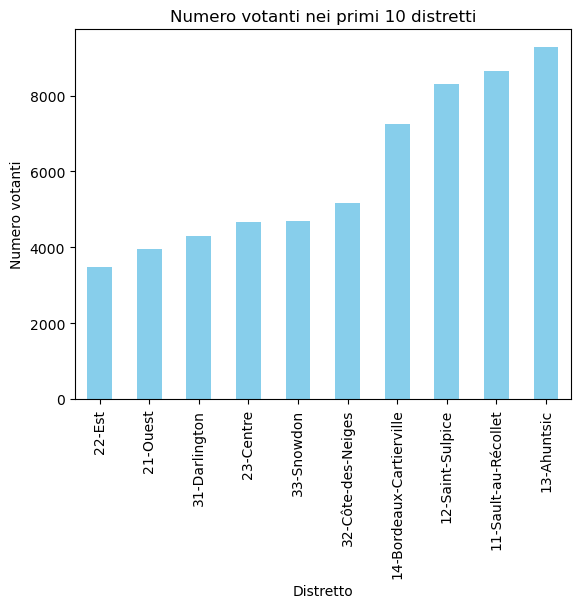

In [34]:
#Creo grafico a barre, per visualizzare numero votanti nei primi 10 distretti
top_ten_districts.sort_values(by="total").plot(x="district", y="total", kind="bar", color="skyblue", legend=False)
#legend=False -> disabilito legenda nel grafico
plt.title("Numero votanti nei primi 10 distretti")                 #Imposto titolo grafico
plt.xlabel("Distretto")                                            #Etichettia asse X
plt.ylabel("Numero votanti")                                       #Etichettia asse Y
plt.show()                                                         #Visualizzo grafico 

* Visualizzare un grafico a barre comparativo, dove si confrontano i voti presi nei primi 4 distretti per ogni candidato.

In [35]:
print(sorted(election['district_id'].unique()))

[11, 12, 13, 14, 21, 22, 23, 31, 32, 33, 34, 35, 41, 42, 43, 51, 52, 61, 62, 63, 64, 71, 72, 73, 74, 81, 82, 91, 92, 93, 94, 101, 102, 111, 112, 113, 121, 122, 123, 131, 132, 133, 134, 141, 142, 151, 152, 161, 162, 171, 172, 181, 182, 183, 191, 192, 193, 194]


In [36]:
#Ordino dati in base colonna 'district_id' e seleziono primi 4 distretti ordinati
top_districts = election.sort_values(by='district_id').head(4)

In [37]:
#Seleziono colonne 'Coderre', 'Bergeron', 'Joly' e 'district', dal dataframe filtrato 'top_districts'
#Imposto 'district' come indice, per creare un dataframe comparativo, per voti per candidato nei distretti
comparison_data = top_districts[['Coderre', 'Bergeron', 'Joly', 'district']].set_index('district')

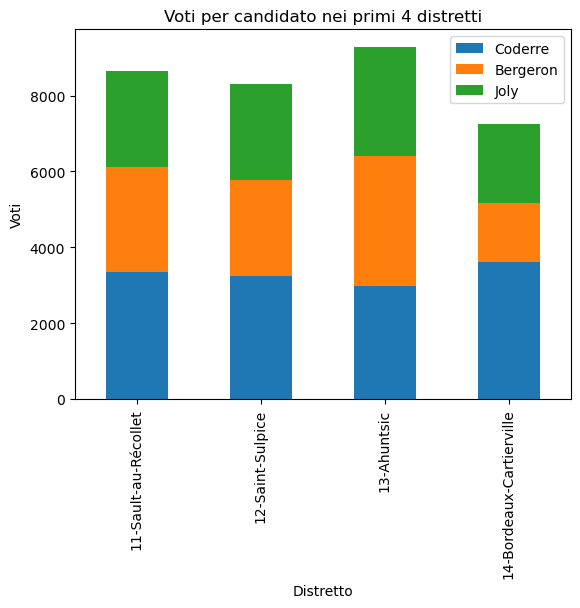

In [38]:
comparison_data.plot(kind='bar', stacked=True)           #Creo grafico a barre, per visualizzare dati 'comparison_data'
#stacked=True -> le barre saranno sovrapposte (stacked), per mostrare valori combinati per ogni distretto
plt.title('Voti per candidato nei primi 4 distretti')    #Imposto titolo grafico  
plt.ylabel('Voti')                                       #Etichettia asse X
plt.xlabel('Distretto')                                  #Etichettia asse Y
plt.show()                                               #Visualizzo grafico

#### Esercizio 5:
Scarichiamo i file party_in_nyc.csv, relativo a quante volte è stata chiamata la polizia per delle feste eccessivamente rumorose. 

In [39]:
party  = pd.read_csv("Datasets/altri_dataset/party_in_nyc.csv")
display(party)

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
...,...,...,...,...,...,...,...,...
225409,2016-12-31 23:53:57,2017-01-01 00:01:41,Store/Commercial,10003.0,NEW YORK,MANHATTAN,40.730073,-73.986585
225410,2016-12-31 23:55:01,2017-01-01 02:05:06,Residential Building/House,10032.0,NEW YORK,MANHATTAN,40.833144,-73.944617
225411,2016-12-31 23:56:20,2017-01-01 13:34:00,Residential Building/House,11104.0,SUNNYSIDE,QUEENS,40.743662,-73.923067
225412,2016-12-31 23:56:41,2017-01-01 03:49:12,Residential Building/House,10040.0,NEW YORK,MANHATTAN,40.858447,-73.929279


In [40]:
display(party.describe().round(2))

,Incident Zip,Latitude,Longitude
count,224424.00,223946.00,223946.00
mean,10720.02,40.75,-73.92
std,576.83,0.08,0.06
min,83.00,40.50,-74.25
25%,10039.00,40.68,-73.96
50%,10469.00,40.74,-73.93
75%,11225.00,40.83,-73.89
max,11697.00,40.91,-73.70


* Realizziamo un grafico che mostra quante chiamate ci sono state per ogni città, per tutti i tipi di locale.

In [41]:
#Raggruppo dati per città (colonna 'City'), in ordine decrescente
city_calls = party.groupby("City").size().sort_values(ascending=False)
print(city_calls)

City
BROOKLYN               68909
NEW YORK               64112
BRONX                  47673
STATEN ISLAND           5411
JAMAICA                 4041
ASTORIA                 3456
CORONA                  2395
RIDGEWOOD               2228
SOUTH OZONE PARK        1852
SOUTH RICHMOND HILL     1764
FLUSHING                1761
FAR ROCKAWAY            1535
OZONE PARK              1494
WOODSIDE                1284
ELMHURST                1260
EAST ELMHURST           1258
JACKSON HEIGHTS         1229
WOODHAVEN               1116
RICHMOND HILL           1079
LONG ISLAND CITY        1072
QUEENS VILLAGE           954
SUNNYSIDE                691
HOLLIS                   670
FRESH MEADOWS            613
SAINT ALBANS             579
FOREST HILLS             532
COLLEGE POINT            529
ARVERNE                  510
SPRINGFIELD GARDENS      470
HOWARD BEACH             438
WHITESTONE               429
MASPETH                  409
ROCKAWAY PARK            378
ROSEDALE                 366
KEW GARDE

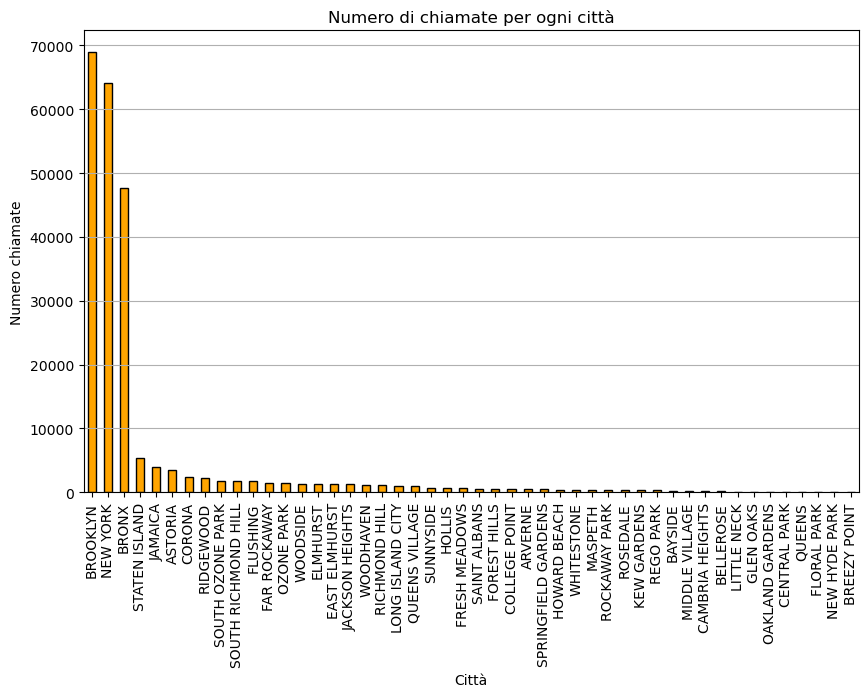

In [42]:
#Se non usavo .groupby(), potevo fare direttamento un 'countplot', invece con raggruppamento uso un 'barplot'

plt.figure(figsize=(10, 6))                                     #Imposto dimensione figura
city_calls.plot(kind="bar", color="orange", edgecolor="black")  #Creo grafico a barre, con dati aggregati 'city_calls'
plt.title("Numero di chiamate per ogni città")                  #Imposto titolo grafico  
plt.xlabel("Città")                                             #Etichettia asse X
plt.ylabel("Numero chiamate")                                   #Etichettia asse Y
plt.grid(axis="y")                                              #Aggiungo griglia, per facilitare lettura valori lungo l'asse y
plt.show()                                                      #Visualizzo grafico

* Qual è il rettangolo di latitudine e longitudine, considerato dal dataset?

In [43]:
min_lat = party["Latitude"].min()      #Trovo latitudine minima
max_lat = party["Latitude"].max()      #Trovo latitudine massima
min_lon = party["Longitude"].min()     #Trovo longitudine minima
max_lon = party["Longitude"].max()     #Trovo longitudine massima

#Stampo rettangolo delimitato da latitudine e longitudine
print(f"Il rettangolo di latitudine e longitudine considerato è: \n"
      f"Latitudine [{min_lat:.2f}, {max_lat:.2f}], Longitudine [{min_lon:.2f}, {max_lon:.2f}]")

Il rettangolo di latitudine e longitudine considerato è: 
Latitudine [40.50, 40.91], Longitudine [-74.25, -73.70]


* Quante segnalazioni sono state fatte per case private?

In [44]:
#Filtro segnalazioni per 'Private House', nella colonna 'Location Type'
private_house_calls = party[party["Location Type"] == "Private House"].shape[0]
print(f"Numero di segnalazioni per case private: {private_house_calls}")

Numero di segnalazioni per case private: 0


In [45]:
#Per verifica -> non ci sono 'Private House'
print(party["Location Type"].value_counts())

Location Type
Residential Building/House    146040
Street/Sidewalk                42353
Store/Commercial               17617
Club/Bar/Restaurant            15766
Park/Playground                 3036
House of Worship                 602
Name: count, dtype: int64


* Con Seaborn, visualizziamo il conteggio delle segnalazioni avvenute in ogni quartiere; che succede se aggiungiamo il parametro hue="Location Type"?
  * Aggiungendo hue="Location Type", distinguo i dati in base al tipo di location -> ottengo un grafico molto più denso di informazioni.  
    I dati del primo e secondo grafico sono gli stessi, solo che nel secondo grafico, invece di avere una singola barra (colonna) per quartiere, viene spezzettata in base alle diverse '*Location Type*' -> si ottiene così un grafico tridimenzionale, con appunto tre dimensioni: quartiere, numero di segnalazioni fatte e il tipo di location.

In [46]:
filtro = party["Borough"] != "Unspecified"

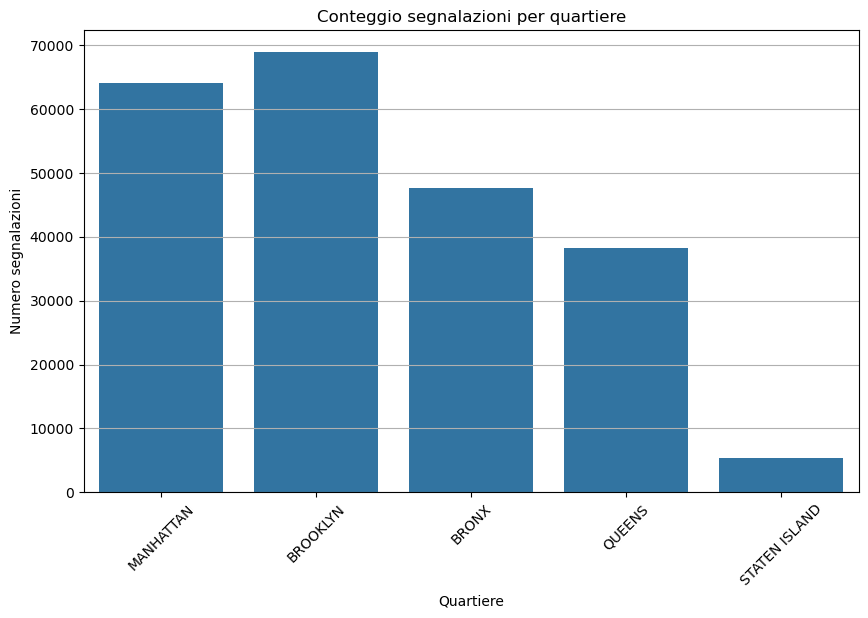

In [47]:
plt.figure(figsize=(10, 6))                             #Imposto dimensione figura
sns.countplot(data=party.loc[filtro], x="Borough")      #Creo grafico a barre, con conteggio segnalazioni per ciascun quartiere
plt.title("Conteggio segnalazioni per quartiere")       #Imposto titolo grafico
plt.xlabel("Quartiere")                                 #Etichetta asse X 
plt.ylabel("Numero segnalazioni")                       #Etichetta asse Y 
plt.xticks(rotation=45)                                 #Ruoto tick asse X di 45°
plt.grid(axis="y")                                      #Aggiungo griglia orizzontale
plt.show()                                              #Visualizzo grafico

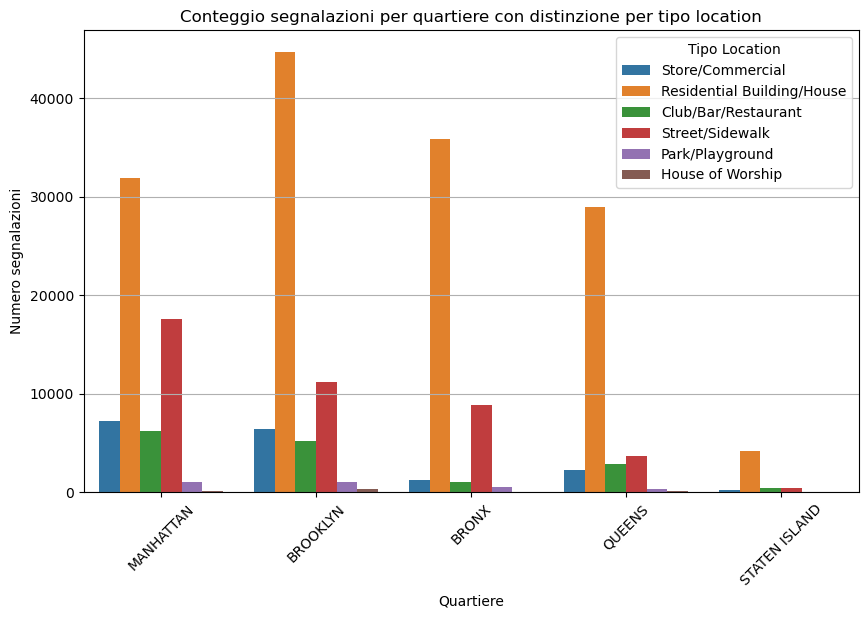

In [48]:
plt.figure(figsize=(10, 6))                                                          #Imposto dimensione figura
#Creo grafico a barre, con conteggio segnalazioni per ciascun quartiere
sns.countplot(data=party.loc[filtro], x="Borough", hue="Location Type")
#hue="Location Type" -> lo utilizzo per distinguere dati, in base al tipo location
plt.title("Conteggio segnalazioni per quartiere con distinzione per tipo location")  #Imposto titolo grafico
plt.xlabel("Quartiere")                                                              #Etichetta asse X 
plt.ylabel("Numero segnalazioni")                                                    #Etichetta asse Y 
plt.xticks(rotation=45)                                                              #Ruoto tick asse X di 45°
plt.legend(title="Tipo Location")                                                    #Aggiungo legenda
plt.grid(axis="y")                                                                   #Aggiungo griglia orizzontale
plt.show()                                                                           #Visualizzo grafico